In [1]:
from facenet_tflite import MTCNNFaceNetTFlite

## Edit content of file FaceIdentify_TFlite/model_path.py

```

PNET_MODEL_PATH = "./facenet_tflite_model/pnet_20180402-114759.tflite"

RNET_MODEL_PATH = "./facenet_tflite_model/rnet_20180402-114759.tflite"

ONET_MODEL_PATH = "./facenet_tflite_model/onet_20180402-114759.tflite"

MODEL_PATH = "./facenet_tflite_model/embedding_20180402-114759.tflite"

```

In [2]:
detector = MTCNNFaceNetTFlite()

In [3]:
detector.extract("./aug_0_4736.jpeg")

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


[{'box': [85, 63, 188, 210],
  'confidence': 0.9997395873069763,
  'keypoints': {'left_eye': (138, 149),
   'right_eye': (222, 123),
   'nose': (190, 182),
   'mouth_left': (173, 231),
   'mouth_right': (238, 210)},
  'embedding': array([ 5.42554259e-02, -1.10411942e-02, -2.64053363e-02,  3.90038528e-02,
          2.36446168e-02, -3.34992781e-02, -4.16866019e-02,  1.82178952e-02,
          6.13591149e-02, -1.59899499e-02,  1.00031435e-01,  8.12427402e-02,
          9.10210386e-02,  5.82842827e-02, -7.29633570e-02, -3.38072330e-02,
         -4.44716178e-02,  1.71366408e-02, -3.49903665e-02,  6.39298186e-02,
         -1.91495977e-02, -7.35045120e-04,  2.60305032e-02, -9.25038755e-02,
         -3.89173366e-02,  1.08059309e-02,  9.05903801e-03, -4.73528951e-02,
          8.82479828e-03, -3.04244496e-02,  6.93417042e-02, -9.47113242e-03,
          2.65062898e-02, -1.42021328e-02, -2.71400088e-04, -2.15768125e-02,
         -7.01960782e-03, -4.32648435e-02, -2.28794385e-02,  3.27555984e-02,
 

In [4]:
detector.extract("./aug_0_4809.jpeg")

[{'box': [150, 70, 188, 228],
  'confidence': 0.9999287128448486,
  'keypoints': {'left_eye': (201, 175),
   'right_eye': (284, 154),
   'nose': (252, 211),
   'mouth_left': (229, 255),
   'mouth_right': (296, 236)},
  'embedding': array([ 1.22236204e-03,  1.07521368e-02, -3.50858085e-02,  1.93766057e-02,
          2.32609604e-02, -3.64139788e-02,  3.96244340e-02,  2.08045896e-02,
          3.50406058e-02,  2.70923097e-02,  8.24713483e-02,  1.65927820e-02,
          1.00395996e-02,  2.62412913e-02, -2.72200368e-02, -4.51176912e-02,
          4.06768769e-02,  2.64540110e-02, -3.40590067e-02, -6.70770649e-03,
         -5.79194725e-02, -2.91406531e-02,  3.28959376e-02, -1.21556774e-01,
         -8.55653360e-02, -8.23413953e-02, -1.18001411e-02, -5.11043184e-02,
          4.28533070e-02, -4.51000743e-02,  2.85576358e-02,  6.55154735e-02,
          2.60130502e-02,  9.39622521e-03, -1.38514265e-02, -7.06547201e-02,
         -4.95806709e-02, -3.76989022e-02, -5.84360361e-02,  2.97225621e-02,


In [5]:
import cv2
import matplotlib.pyplot as plt

In [20]:
results_detector1 = detector.extract("./test_image/aug_0_4809.jpeg")
x, y, w, h = results_detector1[0]['box']
img1 = cv2.cvtColor(cv2.imread("./test_image/aug_0_4809.jpeg"), cv2.COLOR_BGR2RGB) 
img1 = cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 5)

results_detector2 = detector.extract("./test_image/aug_0_4736.jpeg")
x, y, w, h = results_detector2[0]['box']
img2 = cv2.cvtColor(cv2.imread("./test_image/aug_0_4736.jpeg"), cv2.COLOR_BGR2RGB) 
img2 = cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 5)
                     
results_detector3 = detector.extract("./test_image/121674848_10208382996489276_7463440810366480043_n.jpg")
x, y, w, h = results_detector3[0]['box']
img3 = cv2.cvtColor(cv2.imread("./test_image/121674848_10208382996489276_7463440810366480043_n.jpg"), cv2.COLOR_BGR2RGB) 
img3 = cv2.rectangle(img3, (x, y), (x + w, y + h), (0, 0, 255), 5)  

In [26]:
from utils import LoadModelTFlite, TFlitePredict
import numpy as np

Identify_model_path = "./NhiThuy_identify.tflite"
Identify_model = LoadModelTFlite(Identify_model_path)

x = np.array([results_detector1[0]['embedding'], results_detector2[0]['embedding'], results_detector3[0]['embedding']])
y = TFlitePredict(Identify_model, x)

np.round(y, 2) == 1


array([[ True, False, False],
       [False,  True, False],
       [False, False, False]])

Text(0.5, 1.0, 'Nguoi la')

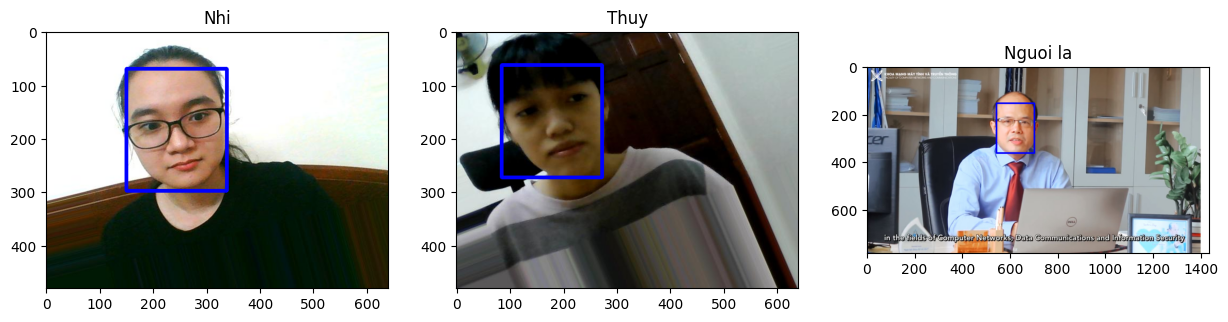

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img1)
ax[0].set_title('Nhi')
ax[1].imshow(img2)
ax[1].set_title('Thuy')
ax[2].imshow(img3)
ax[2].set_title('Nguoi la')